In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import os
import tensorflow as tf
from __future__ import print_function
from tensorflow import keras
from tensorflow.keras import Model



# setting random seed to ensure that results are repeatable
np.random.seed(1)

In [2]:
df = pd.read_csv('spam_data.csv')
df.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=30)
train_X = df_train.drop(columns=['capital_run_length_total'])
train_y = df_train['capital_run_length_total']

## Modeling

In [4]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

# logistic regression default


In [5]:
model = LogisticRegression()

In [6]:
lgr = model.fit(train_X, train_y)

C:\Users\HP\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
test_X = df_test.drop(columns=['capital_run_length_total'])
test_y = df_test['capital_run_length_total']


In [8]:
y_pred = model.predict(test_X)
recall=recall_score(test_y, y_pred)
print("recall:", recall)

recall: 0.8775510204081632


# logistic regression using random and grid

In [9]:
lgr = LogisticRegression()

# Define the hyperparameters that you want to search over using a grid search
grid_param = {'penalty': ['l1', 'l2'], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['liblinear', 'saga']}

# Define the hyperparameters that you want to search over using a random search
random_param = {'penalty': ['l1', 'l2'], 
                'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear', 'saga']}

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(lgr, grid_param, cv=5)
grid_search.fit(train_X, train_y)
best_grid = grid_search.best_estimator_

# Perform a random search to find the best hyperparameters
random_search = RandomizedSearchCV(lgr, random_param, cv=5)
random_search.fit(train_X, train_y)
best_random = random_search.best_estimator_

# Evaluate the models on the test set
y_pred_grid = best_grid.predict(test_X)
y_pred_random = best_random.predict(test_X)

# Calculate recall
recall_grid = recall_score(test_y, y_pred_grid)
recall_random = recall_score(test_y, y_pred_random)

print("Recall using grid search:", recall_grid)
print("Recall using random search:", recall_random)

C:\Users\HP\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\HP\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:350: Con

Recall using grid search: 0.8746355685131195
Recall using random search: 0.8746355685131195


# decision tree default

In [10]:
dtclf = DecisionTreeClassifier(random_state=42)

# train the classifier on the training data
dtclf.fit(train_X, train_y)

# make predictions on the testing data
y_pred = dtclf.predict(test_X)

# calculate recall of the classifier
recall = recall_score(test_y, y_pred)

print("Recall: {:.2f}%".format(recall*100)) 

Recall: 84.55%


# decision tree using random search and grid search

In [11]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Define random search parameters
random_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2, 20),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 10),
}

# Create decision tree classifier
dtc = DecisionTreeClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5)
grid_search.fit(train_X, train_y)
print('Best parameters for grid search:', grid_search.best_params_)
print("Recall: {:.2f}%".format(recall*100)) 

# Perform random search
random_search = RandomizedSearchCV(estimator=dtc, param_distributions=random_param, n_iter=50, cv=5)
random_search.fit(train_X, train_y)
print('Best parameters for random search:', random_search.best_params_)
y_pred = random_search.predict(test_X)


recall = recall_score(test_y, y_pred)
print("Recall: {:.2f}%".format(recall*100)) 


Best parameters for grid search: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Recall: 84.55%
Best parameters for random search: {'min_samples_split': 18, 'min_samples_leaf': 2, 'max_depth': 17, 'criterion': 'entropy'}
Recall: 83.09%


## Neural Network

#### Without Randomsearch and gridsearch cv

In [10]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(60,50,40), solver='adam', max_iter=200)
_ = ann.fit(train_X,np.ravel( train_y))

CPU times: total: 2.59 s
Wall time: 1.37 s


In [11]:
%%time
y_pred = ann.predict(test_X)

CPU times: total: 15.6 ms
Wall time: 6.98 ms


In [12]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       578
           1       0.85      0.90      0.87       343

    accuracy                           0.90       921
   macro avg       0.89      0.90      0.89       921
weighted avg       0.90      0.90      0.90       921



## With RandomizedSearchCV

In [13]:
%%time

score_measure = "recall"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (50,), (70,),(50,30), (40,20), (60,40, 20), (70,50,40)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .2, .5, .7, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1, 0.2, 0.5],
    'max_iter': [5000]
}

ann = MLPClassifier()
grid_search = RandomizedSearchCV(estimator = ann, param_distributions=param_grid, cv=kfolds, n_iter=100,
                           scoring=score_measure, verbose=1, n_jobs=-1, 
                           return_train_score=True)

_ = grid_search.fit(train_X, train_y)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'solver': 'adam', 'max_iter': 5000, 'learning_rate_init': 0.1, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (60, 40, 20), 'alpha': 0.2, 'activation': 'logistic'}
CPU times: total: 3.47 s
Wall time: 10min 41s


In [14]:
%%time
y_pred = bestRecallTree.predict(test_X)

print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.51      0.65       578
           1       0.52      0.89      0.65       343

    accuracy                           0.65       921
   macro avg       0.70      0.70      0.65       921
weighted avg       0.75      0.65      0.65       921

CPU times: total: 15.6 ms
Wall time: 37.3 ms


## With GridSearchCV

In [15]:
%%time

score_measure = "recall"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (30,), (50,), (70,), (90,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [.5, .7, 1],
    'learning_rate': ['adaptive', 'invscaling'],
    'learning_rate_init': [0.005, 0.01, 0.15],
    'max_iter': [5000]
}

ann = MLPClassifier()
grid_search = GridSearchCV(estimator = ann, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  
                           return_train_score=True)

_ = grid_search.fit(train_X, train_y)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
{'activation': 'tanh', 'alpha': 0.5, 'hidden_layer_sizes': (30,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'max_iter': 5000, 'solver': 'adam'}
CPU times: total: 3.92 s
Wall time: 3min 10s


In [16]:
%%time
y_pred = bestRecallTree.predict(test_X)

print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       578
           1       0.75      0.92      0.83       343

    accuracy                           0.86       921
   macro avg       0.85      0.87      0.85       921
weighted avg       0.87      0.86      0.86       921

CPU times: total: 31.2 ms
Wall time: 24.9 ms


In [17]:
c_matrix = confusion_matrix(test_y, y_pred)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
print(f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.7f} Precision={TP/(TP+FP):.7f} Recall={TP/(TP+FN):.7f} F1={2*TP/(2*TP+FP+FN):.7f}")


Accuracy=0.8577633 Precision=0.7523810 Recall=0.9212828 F1=0.8283093


## Keras with SKlearn

In [18]:
%%time


def build_clf(meta, hidden_layer_sizes, dropout):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    target_encoder_ = meta["target_encoder_"]
    
    model = tf.keras.models.Sequential()
    model.add(keras.layers.Input(shape=n_features_in_)),
    #for hidden_layer_size in hidden_layer_sizes:
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, 
            kernel_initializer= tf.keras.initializers.GlorotUniform(), 
            bias_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), 
            activation="relu"))
        model.add(keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    return model



CPU times: total: 0 ns
Wall time: 0 ns


In [19]:
%%time

# If you don't have the following installed, from command line '!pip install scikeras'
from scikeras.wrappers import KerasClassifier

keras_clf = KerasClassifier(
    model=build_clf,
    hidden_layer_sizes=42,
    dropout=0.5,
    optimizer=keras.optimizers.Adam,
    optimizer__learning_rate=0.0001
)
keras_clf.get_params()

CPU times: total: 31.2 ms
Wall time: 33.8 ms


{'model': <function __main__.build_clf(meta, hidden_layer_sizes, dropout)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam,
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'hidden_layer_sizes': 42,
 'dropout': 0.5,
 'optimizer__learning_rate': 0.0001,
 'class_weight': None}

In [20]:
%%time

params = {
    
    # the following are model parameters, and therefore must be defined as parameters in the KarasClassifier, and then in the build_clf function
    'model__hidden_layer_sizes': [(20,),(30, ), (70,), (90, 80)], # this will require KarasClassifier and build_clf to have hidden_layer_sizes parameter set
    'model__dropout': [0, 0.1], # this will require KarasClassifier and build_clf to have hidden_layer_sizes parameter set
    
    # the following are 'fit' parameters, the scikeras wrapper provides these parameters. These are passed to the 'model.fit' method for each fit of the model
    'batch_size':[10, 20, 40],
    'epochs':[10],
    'optimizer':['adam','sgd'],
    'loss':['binary_crossentropy'],
    
    # this is added to the optimizer 
    'optimizer__learning_rate': [0.0001, 0.001, 0.01]

}
keras_clf.get_params()

CPU times: total: 0 ns
Wall time: 0 ns


{'model': <function __main__.build_clf(meta, hidden_layer_sizes, dropout)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam,
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'hidden_layer_sizes': 42,
 'dropout': 0.5,
 'optimizer__learning_rate': 0.0001,
 'class_weight': None}

In [21]:
%%time

from sklearn.model_selection import RandomizedSearchCV
#from tensorflow.keras.callbacks import EarlyStopping

rnd_search_cv = RandomizedSearchCV(
    estimator=keras_clf, 
    param_distributions=params, 
    scoring='recall', 
    n_iter=100, 
    cv=3)

# In rare cases, you may find your model training results in exceeding python's default recursion limit.
# If needed, you can increase this excersion limit by using the following code.
#import sys
#sys.setrecursionlimit(10000) # note: the default is 3000 (python 3.9)

_ = rnd_search_cv.fit(train_X, train_y,  verbose=1)

# You can create 'call back' functions. These are functions that will be called at the 
# end of each epoch. There are a number of builtin functions created for this purpose, 
# one of which is EarlyStopping -- that, based on the parameters you give, will stop
# the training process. This is useful when the algorithm is not making any significant
# gains through further training. 
#earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
#callback = [earlystop]
#_ = rnd_search_cv.fit(X_train, y_train, callbacks=callback, verbose=0)


Epoch 1/10
246/246 [==============================] - 1s 2ms/step - loss: 2.1620
Epoch 2/10
246/246 [==============================] - 1s 2ms/step - loss: 0.6715
Epoch 3/10
246/246 [==============================] - 1s 2ms/step - loss: 0.6436
Epoch 4/10
246/246 [==============================] - 1s 2ms/step - loss: 0.6509
Epoch 5/10
246/246 [==============================] - 1s 2ms/step - loss: 0.6442
Epoch 6/10
246/246 [==============================] - 1s 2ms/step - loss: 0.6563
Epoch 7/10
246/246 [==============================] - 1s 2ms/step - loss: 0.6539
Epoch 8/10
246/246 [==============================] - 1s 2ms/step - loss: 0.7304
Epoch 9/10
246/246 [==============================] - 1s 2ms/step - loss: 0.6586
Epoch 10/10
123/123 [==============================] - 0s 2ms/step
Epoch 1/10
246/246 [==============================] - 1s 3ms/step - loss: 1.5455
Epoch 2/10
246/246 [==============================] - 1s 3ms/step - loss: 0.6362
Epoch 3/10
246/246 [======================

In [22]:
rnd_search_cv.best_params_

{'optimizer__learning_rate': 0.0001,
 'optimizer': 'sgd',
 'model__hidden_layer_sizes': (30,),
 'model__dropout': 0,
 'loss': 'binary_crossentropy',
 'epochs': 10,
 'batch_size': 40}

In [23]:
best_model = rnd_search_cv.best_estimator_

In [24]:
%%time

print(f"best score {best_model.score(test_X, test_y)}")
print(f"min loss {min(best_model.history_['loss'])}")

24/24 [==============================] - 0s 2ms/step
best score 0.46905537459283386
min loss 0.9698746204376221
CPU times: total: 250 ms
Wall time: 188 ms


In [25]:
best_model.history_

defaultdict(list,
            {'loss': [2.804966926574707,
              1.3703210353851318,
              1.2535996437072754,
              1.2459437847137451,
              1.196454405784607,
              1.0214217901229858,
              1.3304944038391113,
              1.0093417167663574,
              1.0721668004989624,
              0.9698746204376221]})

24/24 [==============================] - 0s 2ms/step


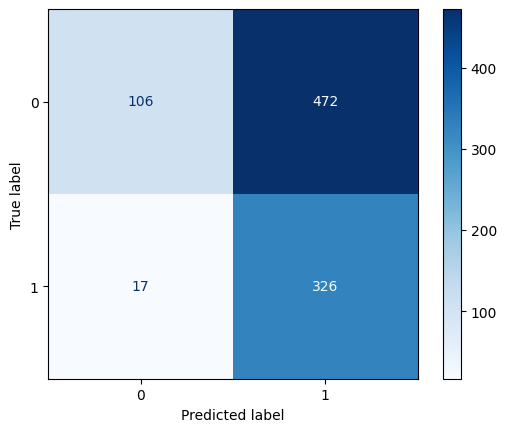

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, best_model.predict(test_X))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [27]:
from sklearn.metrics import classification_report

print(classification_report(test_y, best_model.predict(test_X), digits=4))

24/24 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0     0.8618    0.1834    0.3024       578
           1     0.4085    0.9504    0.5714       343

    accuracy                         0.4691       921
   macro avg     0.6352    0.5669    0.4369       921
weighted avg     0.6930    0.4691    0.4026       921



In [28]:
y_pred=best_model.predict(test_X)

24/24 [==============================] - 0s 2ms/step


In [29]:
%%time
y_pred = best_model.predict(test_X)
print(classification_report(test_y, y_pred))

24/24 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.18      0.30       578
           1       0.41      0.95      0.57       343

    accuracy                           0.47       921
   macro avg       0.64      0.57      0.44       921
weighted avg       0.69      0.47      0.40       921

CPU times: total: 266 ms
Wall time: 162 ms


In [30]:
c_matrix = confusion_matrix(test_y, y_pred)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
print(f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.7f} Precision={TP/(TP+FP):.7f} Recall={TP/(TP+FN):.7f} F1={2*TP/(2*TP+FP+FN):.7f}")



Accuracy=0.4690554 Precision=0.4085213 Recall=0.9504373 F1=0.5714286


## Conclusion

Keras with SKlearn gives the best recall score of 0.950. As compared to the previous techniques keras can easily integrate with TensorFlow and helps in pre processing the data efficiently by which the learning model produces good recall score. 